<a href="https://colab.research.google.com/github/MrDuck557/DistractedDriving/blob/main/DistractedDriversProjectConvModelPresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distracted Driver Recognition
The data set for this project is split into two parts: `labels`, which includes all of the classes for our images and `image_data`, which has a 2-D representation of our images. The possible classes an image can take are:
* Attentive
* DrinkingCoffee
* UsingMirror
* UsingRadio



In [ ]:
#@title Load your dataset { display-mode: "form" }
import numpy as np
import pandas as pd

'''!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Driver%20Distraction%20Detection/metadata.csv'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Driver%20Distraction%20Detection/image_data.npy'

### pre-loading all data of interest
all_image_data = np.load('image_data.npy')
image_data = all_image_data.reshape((9037, 64,64,3))
metadata = pd.read_csv('metadata.csv')
labels = metadata['class']'''

"!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Driver%20Distraction%20Detection/metadata.csv'\n!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Driver%20Distraction%20Detection/image_data.npy'\n\n### pre-loading all data of interest\nall_image_data = np.load('image_data.npy')\nimage_data = all_image_data.reshape((9037, 64,64,3))\nmetadata = pd.read_csv('metadata.csv')\nlabels = metadata['class']"

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
directory_string = "/content/drive/MyDrive/Inspirit1:1/KaggleDistractedDriving/"

Mounted at /content/drive


In [ ]:
!rm -r /content/sample_data

In [ ]:
import os
directory_string = "KaggleDistractedDriving/"
if (not os.path.isdir(directory_string)):
    !unzip /content/drive/MyDrive/Inspirit1:1/KaggleDistractedDriving.zip -d KaggleDistractedDriving
else:
    print("Directory already exists")

Streaming output truncated to the last 5000 lines.
  inflating: KaggleDistractedDriving/imgs/train/c6/img_86740.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_86769.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_86803.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_86869.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_87017.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_87034.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_87158.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_8716.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_87165.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_87168.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_87341.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_8736.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_87360.jpg  
  inflating: KaggleDistractedDriving/imgs/train/c6/img_875.jpg  
  inflating: Ka

In [ ]:
#partition out 3 "random" images
!mkdir reserve/
!mkdir reserve/c0
!cp /content/KaggleDistractedDriving/imgs/train/c0/img_100191.jpg reserve/c0/img_100191.jpg
!mkdir reserve/c5
!cp /content/KaggleDistractedDriving/imgs/train/c5/img_100556.jpg reserve/c5/img_100556.jpg
!mkdir reserve/c8
!cp /content/KaggleDistractedDriving/imgs/train/c8/img_100787.jpg reserve/c8/img_100787.jpg

In [ ]:
#copying to "local" drive to hopefully speed up
#!cp -R /content/drive/MyDrive/Inspirit1:1/KaggleDistractedDriving/ KaggleDistractedDriving
#directory_string = "KaggleDistractedDriving/"

In [ ]:
metadata = pd.read_csv(directory_string + 'driver_imgs_list.csv')
metadata

subject classname            img
0        p012        c0  img_10206.jpg
1        p012        c0  img_27079.jpg
2        p012        c0  img_50749.jpg
3        p012        c0  img_97089.jpg
4        p012        c0  img_37741.jpg
...       ...       ...            ...
34919    p075        c9  img_15827.jpg
34920    p075        c9  img_16688.jpg
34921    p075        c9  img_64532.jpg
34922    p075        c9   img_7918.jpg
34923    p075        c9  img_84918.jpg

[34924 rows x 3 columns]

In [ ]:
img_map = {}
for x in range(len(metadata)):
    img_map[metadata.iloc[x]['img']] = metadata.iloc[x]['classname']

In [ ]:
len(img_map)
#frustratingly this count is actually correct
#apparently there are only this many unique values for the image names (as reported by kaggle)
#a quick microsoft excel sort reveals that there are exactly two entries with identical information for every unique image
#a quick number check shows this is probably correct (34924 / 2 = 17462)

17462

In [ ]:
import os
img_count = 0
#img_file_map = {}
for dirname, _, filenames in os.walk(directory_string + 'imgs'):
    for filename in filenames:
        #img_file_map[filename] = 0
        res = img_map.get(filename, 0)
        if (res != 0):
            img_count+=1
print(img_count)
test_img_count = 0
for dirname, _, filenames in os.walk(directory_string + 'imgs/test'):
    for filename in filenames:
        #img_file_map[filename] = 0
        res = img_map.get(filename, -1)
        if (res != -1):
            test_img_count+=1
print(test_img_count)
#great
#there are more unique images in the files than are unique filenames in the metadata
#the upshot is that every image in img_map exists in the files
#so simply discarding the extra images is an option

17462
0


In [ ]:
my_image_size = (160,120)

(120, 160, 3)


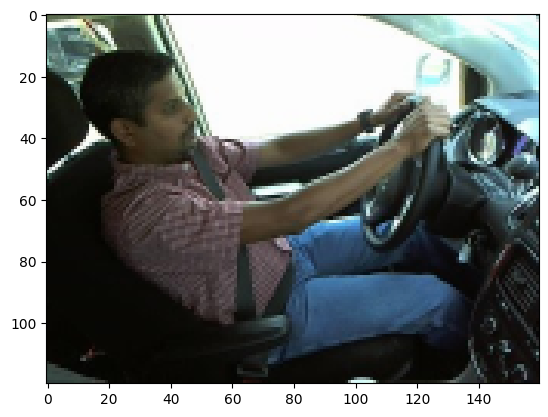

In [ ]:
import cv2
import matplotlib.pyplot as plt

#testing cv2's capability of reading images and resizing them
img_34 = cv2.imread(directory_string + 'imgs/train/c0/img_34.jpg')
img_34_normalized = cv2.cvtColor(img_34, cv2.COLOR_BGR2RGB) / 256.0
img_34_resized = cv2.resize(img_34_normalized, dsize=my_image_size)
plt.imshow(img_34_resized)
print(img_34_resized.shape)

You may use Matplotlib's `imshow` function to display the images in your dataset:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
import tensorflow as tf
import time
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17825658185111202290
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10528789651222022197
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
#make generators
'''train_generator, validation_generator = utils.image_dataset_from_directory(
    (directory_string + "imgs/train"),
    labels = "inferred",
    color_mode = "rgb",
    label_mode = "categorical",
    image_size = (my_image_size[1],my_image_size[0]),
    batch_size = 512,
    validation_split = 0.2,
    shuffle = True,
    seed = 10,
    #data_format = "channel_last",
    subset = "both"
)'''

'train_generator, validation_generator = utils.image_dataset_from_directory(\n    (directory_string + "imgs/train"),\n    labels = "inferred",\n    color_mode = "rgb",\n    label_mode = "categorical",\n    image_size = (my_image_size[1],my_image_size[0]),\n    batch_size = 512,\n    validation_split = 0.2,\n    shuffle = True,\n    seed = 10,\n    #data_format = "channel_last",\n    subset = "both"\n)'

In [ ]:
import random

def add_noise(img, doClipping = True):
    '''Add random noise to an image'''
    VARIABILITY = 30
    deviation = VARIABILITY * (random.random()*0.4 + 0.6)
    noise = np.random.normal(0, deviation, img.shape)
    #return noise
    img += noise
    #return img
    if (doClipping):
        return np.clip(img, 0, 255)
    else:
        return img

img_data_generator = keras.preprocessing.image.ImageDataGenerator(
    #rotation_range=20,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #zoom_range=0.1,
    preprocessing_function=add_noise,
    data_format = "channels_last",
    validation_split = 0.2,
    #brightness_range = [1,2]
)

orig_train_generator = img_data_generator.flow_from_directory(
    directory = (directory_string + "imgs/train"),
    target_size = (my_image_size[1],my_image_size[0]),
    batch_size = 512,
    shuffle = True,
    seed = 10,
    subset = "training"
)

orig_validation_generator = img_data_generator.flow_from_directory(
    directory = (directory_string + "imgs/train"),
    target_size = (my_image_size[1],my_image_size[0]),
    batch_size = 512,
    shuffle = True,
    seed = 10,
    subset = "validation"
)

Found 13975 images belonging to 10 classes.
Found 3487 images belonging to 10 classes.


In [ ]:
import os
#takes the image generator
#does cache (affine transforms are expensive)
#  and amplification (to reduce the effect of using premade noise)
class FileGeneratorWrapper(utils.Sequence):
    def __init__(self, file_folder, file_name):
        try:
            os.mkdir(file_folder)
        except:
            pass
        self.file_path = file_folder + file_name
        self.file_folder = file_folder
        self.update_count()

    def update_count(self):
        lst = os.listdir(self.file_folder)
        self.batch_count = len(lst) // 2

    def make_files(self, generator):
        self.batch_count = 0
        cur_index = 0
        for x in range(4):
            start_index = -1
            for images, labels in generator:
                if (start_index == -1):
                    start_index = generator.batch_index
                elif (start_index == generator.batch_index):
                    break
                img_file = 0
                label_file = 0
                try:
                    img_file = open(self.file_path + "images" + str(cur_index) + ".npy", "xb")
                except:
                    img_file = open(self.file_path + "images" + str(cur_index) + ".npy", "wb")
                np.save(img_file, images)
                try:
                    label_file = open(self.file_path + "labels" + str(cur_index) + ".npy", "xb")
                except:
                    label_file = open(self.file_path + "labels" + str(cur_index) + ".npy", "wb")
                np.save(label_file, labels)
                cur_index += 1
                self.batch_count += 1
                print("Done "+self.file_path + str(cur_index))
            print("Done "+str(x)+ " iteration")

    def __len__(self):
        return self.batch_count

    def __getitem__(self, idx):
        images = np.load(self.file_path + "images" + str(idx) + ".npy")
        labels = np.load(self.file_path + "labels" + str(idx) + ".npy")
        return images, labels

In [ ]:
train_generator = FileGeneratorWrapper("train/", "data_")
validation_generator = FileGeneratorWrapper("validation/", "data_")

unzipFiles = True
if (unzipFiles):
    #!unzip /content/drive/MyDrive/Inspirit1:1/train_data.zip -d /content/
    !unzip /content/drive/MyDrive/Inspirit1:1/validation_data.zip -d /content/
    train_generator.update_count()
    validation_generator.update_count()
else:
    train_generator.make_files(orig_train_generator)
    validation_generator.make_files(orig_validation_generator)

Archive:  /content/drive/MyDrive/Inspirit1:1/validation_data.zip
  inflating: /content/validation/data_labels6.npy  
  inflating: /content/validation/data_labels22.npy  
  inflating: /content/validation/data_labels7.npy  
  inflating: /content/validation/data_labels16.npy  
  inflating: /content/validation/data_images12.npy  
  inflating: /content/validation/data_images0.npy  
  inflating: /content/validation/data_images9.npy  
  inflating: /content/validation/data_labels24.npy  
  inflating: /content/validation/data_labels20.npy  
  inflating: /content/validation/data_labels10.npy  
  inflating: /content/validation/data_images19.npy  
  inflating: /content/validation/data_labels12.npy  
  inflating: /content/validation/data_images13.npy  
  inflating: /content/validation/data_images7.npy  
  inflating: /content/validation/data_labels25.npy  
  inflating: /content/validation/data_labels15.npy  
  inflating: /content/validation/data_images18.npy  
  inflating: /content/validation/data_i

In [ ]:
print(train_generator.batch_count)
print(validation_generator.batch_count)

0
28


In [ ]:
make_zip = False
if (make_zip):
    !zip -r train_data.zip train

In [ ]:
make_zip = False
if (make_zip):
    print(os.path.getsize('train_data.zip'))

In [ ]:
if (make_zip):
    !cp train_data.zip /content/drive/MyDrive/Inspirit1:1/train_data.zip

In [ ]:
make_zip = False
if (make_zip):
    !zip -r validation_data.zip validation/

In [ ]:
if (make_zip):
    print(os.path.getsize('validation_data.zip'))

In [ ]:
if (make_zip):
    !cp validation_data.zip /content/drive/MyDrive/Inspirit1:1/validation_data.zip

In [ ]:
transform_img_data_generator = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    #preprocessing_function=add_noise,
    data_format = "channels_last",
    #validation_split = 0.2,
    #brightness_range = [1,2]
)

blank_img_data_generator = keras.preprocessing.image.ImageDataGenerator(
    data_format = "channels_last",
    #brightness_range = [1,2]
)

reserve_transform_generator = transform_img_data_generator.flow_from_directory(
    directory = "reserve",
    target_size = (my_image_size[1],my_image_size[0]),
    batch_size = 3,
    shuffle = False,
)

reserve_blank_generator = blank_img_data_generator.flow_from_directory(
    directory = "reserve",
    target_size = (my_image_size[1],my_image_size[0]),
    batch_size = 3,
    shuffle = False,
)

Found 3 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


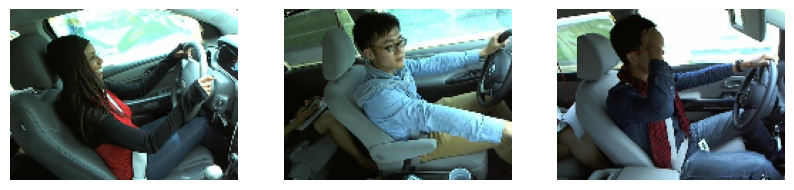

In [ ]:
plt.figure(figsize=(10,10))
reserve_blank_images = 0
for images, labels in reserve_blank_generator:
    reserve_blank_images = images
    break
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    plt.imshow(reserve_blank_images[i].astype("int16"))
    plt.axis("off")

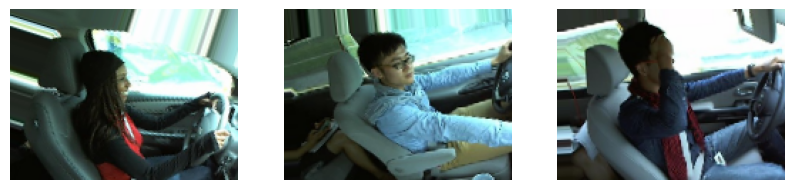

In [ ]:
plt.figure(figsize=(10,10))
reserve_transform_images = 0
for images, labels in reserve_transform_generator:
    reserve_transform_images = images
    reserve_transform_labels = labels
    break
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    plt.imshow(reserve_transform_images[i].astype("int16"))
    plt.axis("off")

In [ ]:
reserve_noise = add_noise(np.zeros_like(reserve_blank_images), False)

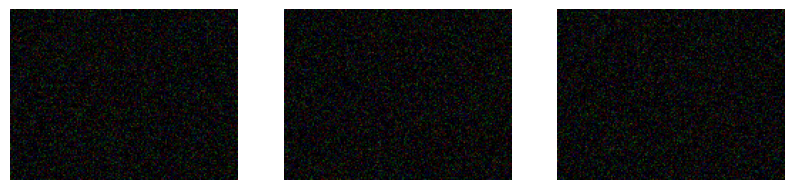

In [ ]:
plt.figure(figsize=(10,10))
reserve_noise_min = np.min(reserve_noise)
reserve_noise_max = np.max(reserve_noise)
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    plt.imshow(reserve_noise[i].astype("int16"))#, vmin = reserve_noise_min, vmax = reserve_noise_max)
    plt.axis("off")

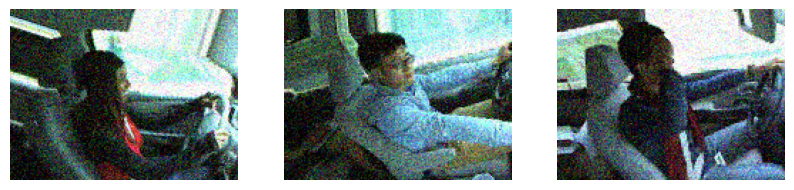

In [ ]:
plt.figure(figsize=(10,10))
reserve_noise_images = np.clip(reserve_transform_images + reserve_noise, 0, 255)
reserve_noise_labels = reserve_transform_labels
for i in range(3):
    ax = plt.subplot(1,3,i+1)
    plt.imshow(reserve_noise_images[i].astype("int16"))
    plt.axis("off")

28
(512, 120, 160, 3)
(512,)


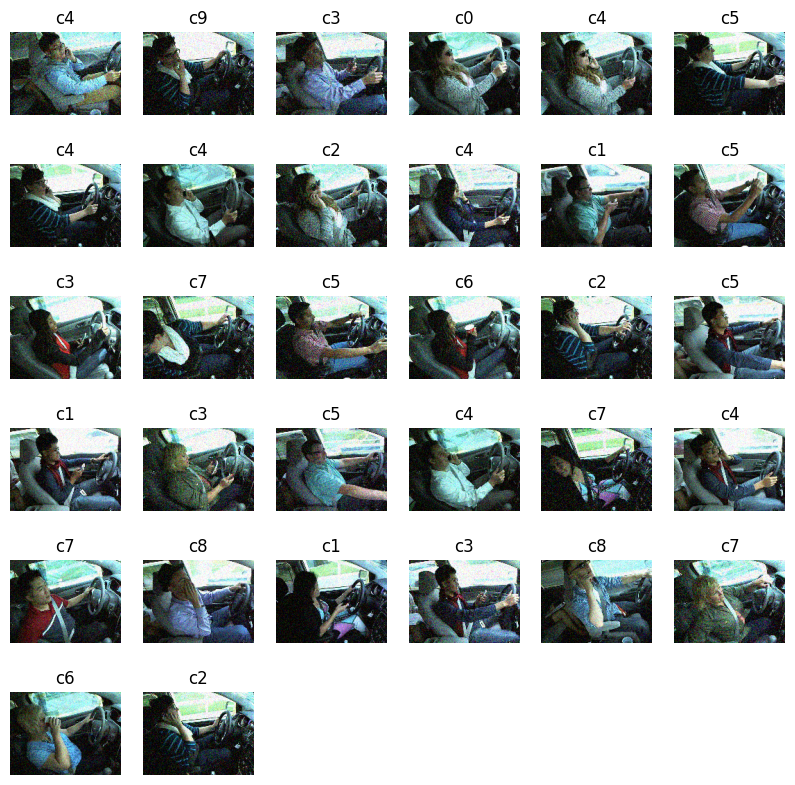

In [ ]:
plt.figure(figsize=(10, 10))
#class_names = validation_generator.class_names
class_names = [("c" + str(x)) for x in range(10)]
test_image = 0
start_index = -1
batch_count = validation_generator.batch_count
for images, labels in validation_generator:
    '''if (start_index == -1):
        start_index = validation_generator.batch_index
    elif (start_index == validation_generator.batch_index):
        break'''
    #batch_count += 1
    if (images.shape[0] == 512):
        test_image = images
        test_labels = labels
        break
for i in range(32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(test_image[i].astype("int16"))
    plt.title(class_names[tf.argmax(test_labels[i])])
    plt.axis("off")
print(batch_count)
print(test_image.shape)
test_labels = tf.math.argmax(test_labels,1)
print(test_labels.shape)

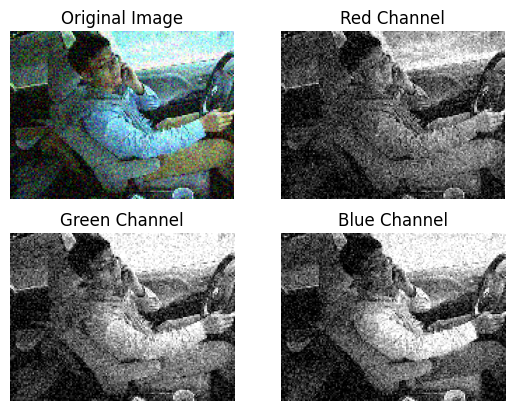

In [ ]:
test_image_np = np.array(test_image).astype("int16")[0]

plt.subplot(2, 2, 1)
plt.imshow(test_image_np)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(test_image_np[:, :, 0], cmap = "gray")
plt.title("Red Channel")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(test_image_np[:, :, 1], cmap = "gray")
plt.title("Green Channel")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(test_image_np[:, :, 2], cmap = "gray")
plt.title("Blue Channel")
plt.axis('off')

plt.show()

In [ ]:
'''conv_model = keras.Sequential(
    [
        layers.Input((64,64,3)),
        layers.Conv2D(5, 5, activation="relu", data_format = "channels_last"),
        layers.MaxPooling2D(pool_size=(2, 2), padding="valid", data_format = "channels_last"),
        layers.Conv2D(10, 5, activation="relu", data_format = "channels_last"),
        layers.MaxPooling2D(pool_size=(2, 2), padding="valid", data_format = "channels_last"),
        layers.Flatten(),
        layers.Dense(128),
        layers.Dense(64),
        layers.Dense(10)
    ]
)'''
'''conv_model = keras.Sequential(
    [
        layers.Input((64,64,3)),
        layers.Flatten(),
        layers.Dense(10)
    ]
)'''
conv_model=keras.Sequential()

conv_model.add(layers.Input((my_image_size[1],my_image_size[0],3)))
conv_model.add(layers.Rescaling(1.0/255))

conv_model.add(layers.Conv2D(32, (5,5),activation='relu'))
#conv_model.add(layers.Dropout(0.25))
conv_model.add(layers.MaxPooling2D(3,3))

#conv_model.add(layers.BatchNormalization())
conv_model.add(layers.Conv2D(8, (5,5), activation="relu"))
conv_model.add(layers.MaxPooling2D(3,3))
#conv_model.add(layers.Conv2D(128, (3,3), activation="relu"))
#conv_model.add(layers.MaxPooling2D(2,2))
#conv_model.add(layers.Conv2D(128, (3,3), activation="relu"))
#conv_model.add(layers.MaxPooling2D(2,2))
#conv_model.add(layers.BatchNormalization())
conv_model.add(layers.Flatten())
#conv_model.add(layers.Dropout(0.2))
conv_model.add(layers.Dense(256,activation='relu'))
conv_model.add(layers.Dense(10, activation='softmax'))
conv_model.compile(loss=keras.losses.CategoricalFocalCrossentropy(), optimizer='adam', metrics = ['categorical_accuracy'])

conv_model.summary()

#on 128x128 images:
#full model is usable after epoch 5, trains in stated 84 seconds (1 min 24 sec)
#not including the intermediate 64 filter and 128 filter layers (and the corresponding max pools)
#   gives a comparable train time at 82 seconds, performance not affected
#not including the 2 128 filter layers and having more aggressive max pooling (4x4)
#   gets 72 seconds (1 min 12 sec) with about same performance
#same as above but with the first dense layer being 64 rather than 512 neurons
#   gets 69 seconds(1 min 9 sec) but decreases performance noticably

#I suspect that grabbing the images from disk is the main limiting factor here
#but with no real alternative this is good enough

#a (32, 3, 3) conv layer, (3, 3) max pooling, (64, 3, 3) conv layer, (3, 3) max pooling, 512 dense, and 10 dense works fairly well with (80,60) sized images
#same model is reasonable with (60, 48) images. Not great though.
#reducing both max poolings to (2, 2) makes it perform much better, with no double-digit errors

#going back up to (160, 120)
#(32,5,5) conv layer, (3,3) max pooling, (64,5,5) conv layer, (3,3) max pooling, 512 dense, and 10 dense works well
#two points of interest: there are only a few activations in a ton of lows. Some neurons appear to be basically unused.
#my theory: the larger kernels pick up more complex details, removing the need for some neurons as more information is packed into the other neurons
#trying again with two (32,5,5) conv layers appears to remove all the wasted neurons with no loss of accuracy
#interestingly, it seems that there might be room to cut more neurons

#with extra noise and data amplification:
#seems like the model (32,5,5),(3,3),(32,5,5),(3,3),512,10 is losing accuracy
#I'll try increase

#testing different data modification permutations:
#using a (64, 5, 5) conv, (3,3) pooling, (32,5,5) conv, (3,3) pooling, (512) dense, and (10 dense)

#no noise or transformations in general predictably gets extremely high training accuracy in 3 epochs  and high validation accuracy
#if it is of interest, 2 minutes to generate the dataset
#however, I am showing the same data to the model 4 times per epoch so...
#interestingly, 2 has the highest variation while 4 5 and 6 have the least. Train accuracy is 0.9975 and validation accuracy is 0.9887 (first run)
# 0 has least variation while 7 and 1 have highest variation, though it seems like it's random (second run)
#third run, same accuracy (0.9987 train, 0.9930 validation). 0 is very low, 3 is very high for some reason

#rotation only (20 degrees)
#takes 7 minutes to generate dataset
#predictably, the aggregation inside one category is blobby
#interestingly, performance doesn't suffer too much (even with same 3 epochs)
#first run: 0.9726 train accuracy, 0.9668 validation accuracy (still pretty good)
#more dead neurons than before. Seems like 8 and 1 have high variation while 9 is bad
#second run: 0.9786 train accuracy, 0.9660 validation accuracy. Most mistakes come from mistakenly classifying stuff as 4
#same number of dead neurons (of course). 1 and 7 have high variation and 0 is the only low variation output.
#third run: 0.9792 train accuracy, 0.9716 validation accuracy. Most mistakes are related to 0.
#1 has highest variation, 8 and 2 are low while 0 is relatively low.

#width shift and zoom (all 0.1)
#takes 7 minutes to generate dataset
#aggregation inside one category looks about as blobby as rotation
#seems to prune down to the two neurons seen with all modifiers active
#first run: 0.8212 train accuracy, 0.8476 validation accuracy (so worse than rotation) (3 epochs again)
#struggles with 0 and 8. 7 and 5 have high variation, while 8 has low variation
#second run: 0.9103 train accuracy, 0.8990 validation accuracy
#has inaccuracy, but less than before. 11 active neurons in the second convolutional layer.
#5 and 1 have high variation, 0 has low variation
#third run: 0.9223 train accuracy, 0.9197 validation accuracy
#no error cases with over 100, though confusing 0 with 9 had 95. Has 9 active neurons in the second conv layer.
#1 has high variation, 0 has low variation. Others vary quite a bit.

#noise only (VARIABILITY = 30)
#takes 4 min to generate dataset
#aggregation has sharp edges
#first run: 0.9982 train accuracy, 0.9900 validation accuracy. (comparable to no modifiers) (3 epochs)
#11 active neurons in second layer
#6, 9, and 7 have high variation, 0, 2, and 1 have low variation.
#second run: 0.9842 train accuracy, 0.9765 validation accuracy
#back to 2 active neurons.
#5 has high variation, 8 and 0 have low variation
#third run: 0.9961 train accuracy, 0.9861 validation accuracy.
#4 neurons in second layer
#3, 6, and 8 have high variation, 0 has low variation.

#rotation, width shift, and zoom
#took 1m (? exceedingly fast) to generate dataset
#aggregation is blobby, again
#first run: 0.8870 train accuracy, 0.8832 validation accuracy
#12 neurons in second layer
#1 has high variation, 0 and 9 have low variation
#second run: 0.8783 train accuracy, 0.8575 validation accuracy
#7 neurons in second layer
#5 and 6 have high variation, 9 and 8 have low variation
#third run: 0.7755 train accuracy, 0.7969 validation accuracy
#5 neurons in second layer
#5 has high variation, while 0, 9, and 8 have low variation

#rotation and noise
#took 9 min to generate
#first run: 0.9496 train accuracy, 0.9534 validation accuracy
#4 neurons in second layer
#7 has high variation, 0 and 3 have low variation
#second run: 0.9625 train accuracy, 0.9565 validation accuracy
#6 neurons in second layer
#1 and 7 have high variation, 0, 4, and 2 have low variation
#third run: 0.9625 train accuracy, 0.9530 validation accuracy
#4 neurons in second layer
#7 and 6 have high variation, 4 and 3 have low variation

#width shift and noise
#took 9 min to generate
#first run: 0.7601 train accuracy, 0.7615 validation accuracy
#1 neuron in second layer
#5 and 1 have high variation, 0, 9, 4, and 8 have low variation
#second run: 0.8271 train accuracy, 0.8316 validation accuracy. Does struggle with overpredicting 0
#2 neurons in second layer
#5 has high variation, 9, 8, and 4 have low variation
#third run: 0.8345 train accuracy, 0.8257 validation accuracy. Overpredicts 8 now
#3 neurons in second layer
#1 has high variation, 2 and 9 have low variation

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 116, 156, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 38, 52, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 48, 8)         6408      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 16, 8)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1408)              0

In [ ]:
import gc

try:
    del test_image_layer_outputs
    del test_image_layer_outputs_np
    print("test_image_layer_outputs deleted")
except:
    print("test_image_layer_outputs does not exist")
gc.collect()

test_image_layer_outputs does not exist


10382

In [ ]:
unzipFiles = True
if (unzipFiles):
    !unzip /content/drive/MyDrive/Inspirit1:1/conv_model_pretrained.zip -d /content/
    conv_model = tf.keras.saving.load_model("conv_model_pretrained", compile = False)
    conv_model.compile(loss=keras.losses.CategoricalFocalCrossentropy(), optimizer='adam', metrics = ['categorical_accuracy'])

Archive:  /content/drive/MyDrive/Inspirit1:1/conv_model_pretrained.zip
   creating: /content/conv_model_pretrained/
  inflating: /content/conv_model_pretrained/saved_model.pb  
   creating: /content/conv_model_pretrained/assets/
 extracting: /content/conv_model_pretrained/fingerprint.pb  
  inflating: /content/conv_model_pretrained/keras_metadata.pb  
   creating: /content/conv_model_pretrained/variables/
  inflating: /content/conv_model_pretrained/variables/variables.index  
  inflating: /content/conv_model_pretrained/variables/variables.data-00000-of-00001  


In [ ]:
if (not unzipFiles):
    model_score = 0
    print("Training.")
    score = (0,0)
    count = 0
    while (score[0] < 0.5 and count < 5):
        #with tf.device('/device:GPU:0'):
        conv_model.fit(x=train_generator, epochs=3, workers=2, use_multiprocessing=True)
        #conv_model.fit(x=X_test, y=y_test_2, epochs = 20)
        #score = conv_model.evaluate(X_test, y_test_2, verbose=0)
        score = (10,0)
        count += 1
    '''for x in range(10):
        start_time = time.time()
        conv_model.fit(x=X_train, y=y_train)
        end_time = time.time()
        print("Took "+str(round(end_time-start_time,2))+" seconds to train.")
        model_score = conv_model.score(X_test,y_test)
        print("Model Score is "+str(model_score)+".")
        if (model_score <= 0.76):
            print("Retraining.")
        else:
            break'''
    #start_time = time.time()
    #conv_model.fit(x=X_train, y=y_train_2, epochs=5)
    #end_time = time.time()
    #print("Took "+str(round(end_time-start_time,2))+" seconds to train.")

In [ ]:
conv_model.evaluate(validation_generator)

28/28 [==============================] - 20s 480ms/step - loss: 0.0074 - categorical_accuracy: 0.9844


[0.007357107475399971, 0.9844422340393066]

In [ ]:
predictions = np.array([])
validation_labels = np.array([])
val_index = 0
for x, y in validation_generator:
  predictions = np.concatenate([predictions, np.argmax(conv_model.predict(x),axis=-1)])
  validation_labels = np.concatenate([validation_labels, np.argmax(np.array(y), axis=-1)])
  val_index += 1
  if (val_index >= batch_count):
    break

np.array(tf.math.confusion_matrix(labels=validation_labels, predictions=predictions))

16/16 [==============================] - 0s 10ms/step


array([[1493,   11,    0,   10,    0,    7,    0,    0,    0,   26],
       [   5, 1410,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    5, 1418,    0,    0,    0,    0,    0,    8,    0],
       [   0,    0,    5, 1446,    8,    0,    2,    0,    1,    0],
       [   3,    0,    0,    1, 1443,    0,    0,    0,    0,    0],
       [   2,    0,    4,    5,    8, 1408,    1,    0,    0,   10],
       [   0,    0,   19,    0,    5,    0, 1431,    0,    0,    0],
       [   0,    0,   11,    0,    3,    0,    0, 1179,    8,    3],
       [   0,    8,    8,    0,    0,    2,    4,    0, 1175,   15],
       [   0,    1,    4,    0,    0,    0,    0,    0,    3, 1328]],
      dtype=int32)

In [ ]:
#predictions = conv_model.predict(X_test)
predictions
#this is a bit of a strange array
#I'll just take the max of all the values

array([4., 9., 3., ..., 8., 2., 0.])

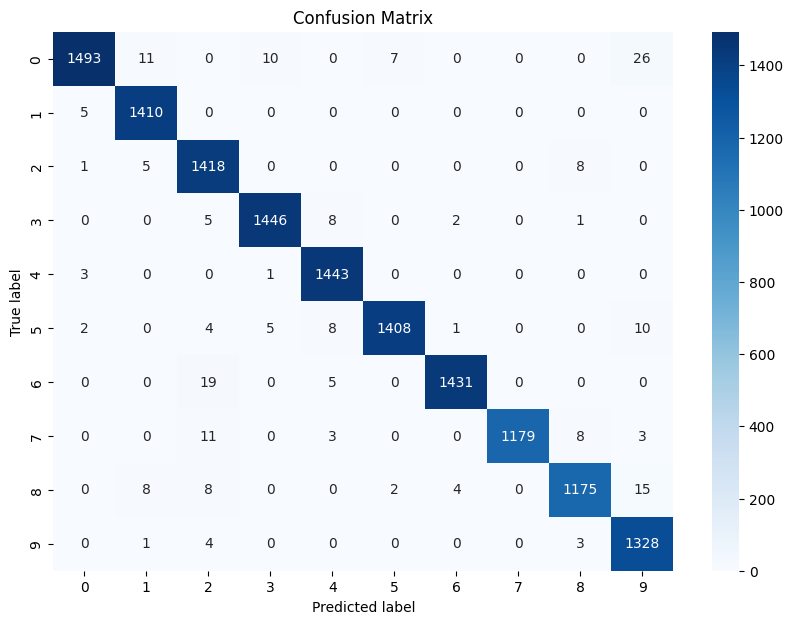

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#print(conv_model.score(X_test,y_test))
# Generate the confusion matrix
distinct_labels = [0,1,2,3,4,5,6,7,8,9]
cm = confusion_matrix(validation_labels,  predictions, labels=distinct_labels)

# Plotting the confusion matrix with labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=distinct_labels, yticklabels=distinct_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
conv_layer = conv_model.layers[1]
conv_layer_weights = conv_layer.get_weights()
print(len(conv_layer_weights))
print(conv_layer_weights[0].shape)
print(conv_layer_weights[1].shape)
print(conv_layer_weights)

2
(5, 5, 3, 32)
(32,)
[array([[[[ 3.70193198e-02, -1.74389854e-02, -4.37887534e-02, ...,
           3.06184264e-03, -6.06112182e-02,  1.03338175e-01],
         [ 1.19946472e-01,  3.33936065e-02, -4.82052937e-03, ...,
           4.44136672e-02,  3.69300283e-02,  1.01635635e-01],
         [-3.92776281e-02, -5.11045419e-02, -9.85057373e-03, ...,
           5.37963845e-02, -1.81041602e-02, -3.12102064e-02]],

        [[-2.77224723e-02,  2.06700210e-02,  7.92375207e-02, ...,
           5.71017293e-03, -3.08611747e-02,  2.33890377e-02],
         [-1.26807438e-02,  2.48177797e-02,  6.28782064e-02, ...,
          -7.23839477e-02,  1.33315092e-02, -3.15974876e-02],
         [ 4.42485623e-02,  4.23248187e-02,  8.73429254e-02, ...,
           5.40400594e-02, -1.11995507e-02, -2.94554606e-02]],

        [[ 2.48180851e-02,  4.59220409e-02,  1.17752768e-01, ...,
          -9.07584205e-02, -5.17031690e-03, -1.54576935e-02],
         [ 4.35287021e-02,  8.91295969e-02,  1.18043320e-02, ...,
          -

In [ ]:
'''error_list = []
for x in range(len(y_test)):
    if y_test[x]!=predictions_2[x]:
        error_list.append(x)
print(error_list)'''

'error_list = []\nfor x in range(len(y_test)):\n    if y_test[x]!=predictions_2[x]:\n        error_list.append(x)\nprint(error_list)'

In [ ]:
'''error_index = error_list[200]
plt.imshow(X_test[error_index].reshape(64,64,3))
print("Real: " + str(y_test[error_index]))
print("Prediction: " + str(predictions[error_index]))'''

'error_index = error_list[200]\nplt.imshow(X_test[error_index].reshape(64,64,3))\nprint("Real: " + str(y_test[error_index]))\nprint("Prediction: " + str(predictions[error_index]))'

In [ ]:
make_zip = False
if (make_zip):
    conv_model.save("conv_model_pretrained")
    !zip -r conv_model_pretrained.zip conv_model_pretrained/
    print(os.path.getsize('/content/conv_model_pretrained.zip'))
    !cp conv_model_pretrained.zip /content/drive/MyDrive/Inspirit1:1/conv_model_pretrained.zip

In [ ]:
test_image.shape

(512, 120, 160, 3)

In [ ]:
test_image_layer_outputs = [0 for x in range(100)]
test_image_layer_outputs_np = [0 for x in range(100)]

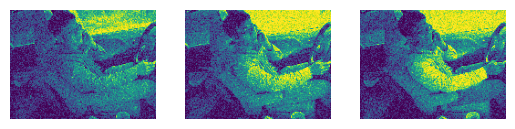

In [ ]:
#the very first input layer
#gets everything else ready
layer_index = 0
test_image_layer_outputs[layer_index] = conv_model.layers[layer_index].call(test_image)
test_image_layer_outputs_np[layer_index] = test_image_layer_outputs[layer_index].numpy()
cur_layer_shape = test_image_layer_outputs[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(1, 3, filter + 1)
    plt.imshow(test_image_layer_outputs_np[layer_index][0][:,:,filter])
    plt.axis("off")
#woohoo it works

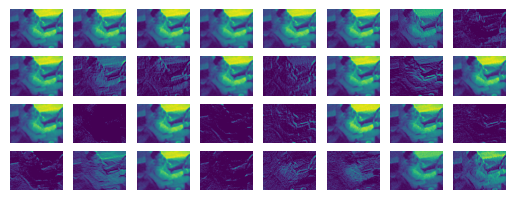

In [ ]:
#now for the actual layers
#going to copy-paste code to "physically" seperate layer images
layer_index = 1
test_image_layer_outputs[layer_index] = conv_model.layers[layer_index].call(test_image_layer_outputs[layer_index-1])
test_image_layer_outputs_np[layer_index] = test_image_layer_outputs[layer_index].numpy()
cur_layer_shape = test_image_layer_outputs[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(test_image_layer_outputs_np[layer_index][0][:,:,filter])
    plt.axis("off")

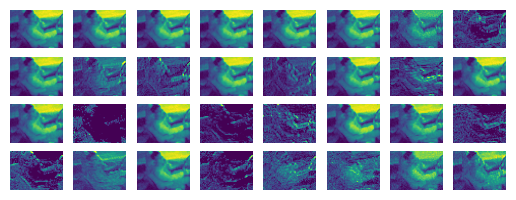

In [ ]:
layer_index = 2
test_image_layer_outputs[layer_index] = conv_model.layers[layer_index].call(test_image_layer_outputs[layer_index-1])
test_image_layer_outputs_np[layer_index] = test_image_layer_outputs[layer_index].numpy()
cur_layer_shape = test_image_layer_outputs[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(test_image_layer_outputs_np[layer_index][0][:,:,filter])
    plt.axis("off")

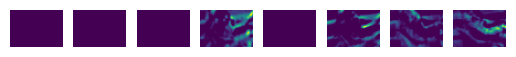

In [ ]:
layer_index = 3
test_image_layer_outputs[layer_index] = conv_model.layers[layer_index].call(test_image_layer_outputs[layer_index-1])
test_image_layer_outputs_np[layer_index] = test_image_layer_outputs[layer_index].numpy()
cur_layer_shape = test_image_layer_outputs[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(test_image_layer_outputs_np[layer_index][0][:,:,filter])
    plt.axis("off")

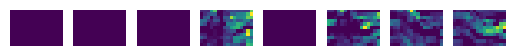

In [ ]:
layer_index = 4
test_image_layer_outputs[layer_index] = conv_model.layers[layer_index].call(test_image_layer_outputs[layer_index-1])
test_image_layer_outputs_np[layer_index] = test_image_layer_outputs[layer_index].numpy()
cur_layer_shape = test_image_layer_outputs[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(test_image_layer_outputs_np[layer_index][0][:,:,filter])
    plt.axis("off")

In [ ]:
flatten_layer = conv_model.layers[5]
flatten_size = flatten_layer.output.shape[1]

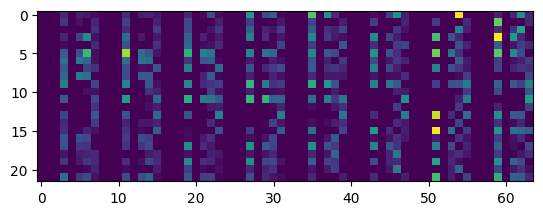

In [ ]:
#past this point we start getting into the flattened layers
#I'll attempt to render it anyways
layer_index = 5
test_image_layer_outputs[layer_index] = conv_model.layers[layer_index].call(test_image_layer_outputs[layer_index-1])
test_image_layer_outputs_np[layer_index] = test_image_layer_outputs[layer_index].numpy()
cur_layer_shape = test_image_layer_outputs[layer_index].shape
plt.figure()
#for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    #ax = plt.subplot(8, 8, filter + 1)
    #plt.imshow(test_image_layer_outputs_np[layer_index][0][:,:,filter])
    #plt.axis("off")
plt.imshow(test_image_layer_outputs_np[layer_index][0].reshape((flatten_size//64,64)))

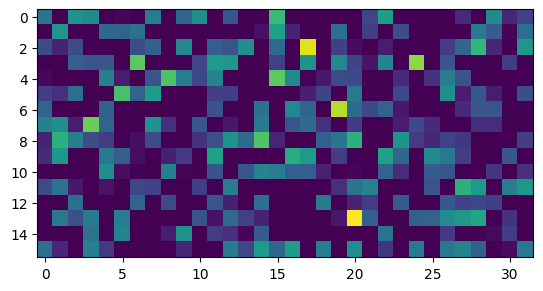

In [ ]:
layer_index = 6
test_image_layer_outputs[layer_index] = conv_model.layers[layer_index].call(test_image_layer_outputs[layer_index-1])
test_image_layer_outputs_np[layer_index] = test_image_layer_outputs[layer_index].numpy()
cur_layer_shape = test_image_layer_outputs[layer_index].shape
plt.figure()
#for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    #ax = plt.subplot(8, 8, filter + 1)
    #plt.imshow(test_image_layer_outputs_np[layer_index][0][:,:,filter])
    #plt.axis("off")
first_dense_shape = (16,32)
plt.imshow(test_image_layer_outputs_np[layer_index][0].reshape(first_dense_shape))

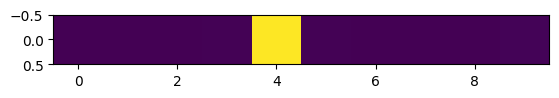

In [ ]:
layer_index = 7
test_image_layer_outputs[layer_index] = conv_model.layers[layer_index].call(test_image_layer_outputs[layer_index-1])
test_image_layer_outputs_np[layer_index] = test_image_layer_outputs[layer_index].numpy()
cur_layer_shape = test_image_layer_outputs[layer_index].shape
plt.figure()
#for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    #ax = plt.subplot(8, 8, filter + 1)
    #plt.imshow(test_image_layer_outputs_np[layer_index][0][:,:,filter])
    #plt.axis("off")
plt.imshow(test_image_layer_outputs_np[layer_index][0].reshape((1,10)))

In [ ]:
print(test_image_layer_outputs[0].shape)
print(test_labels.shape)

(512, 120, 160, 3)
(512,)


In [ ]:
#ok time for aggregation
#will sort by label
label_image_outputs = [[0 for x in range(100)] for x in range(10)]
label_image_counts = [0 for x in range(10)]
for x in range(len(test_image_layer_outputs)): #model layer
    cur_tensor = test_image_layer_outputs[x]
    if (type(cur_tensor) == int):
        break
    for y in range(test_labels.shape[0]): #batch size
        cur_tensor_slice = cur_tensor[y]
        cur_label = test_labels[y]
        if (type(label_image_outputs[cur_label][x]) == int):
            label_image_outputs[cur_label][x] = tf.identity(cur_tensor_slice)
        else:
            label_image_outputs[cur_label][x] += cur_tensor_slice
        label_image_counts[cur_label] += 1
for x in range(10):
    for y in range(100):
        label_image_outputs[x][y] /= label_image_counts[x]

In [ ]:
label_image_diff = [0 for x in range(100)]
max_differences = [0 for x in range(100)]
for cur_label_1 in range(10):
    for cur_label_2 in range(10):
        for z in range(len(label_image_outputs[cur_label_1])):
            cur_tensor = label_image_outputs[cur_label_1][z]
            if (type(cur_tensor) == int):
                break
            label_image_diff[z] = cur_tensor
        for z in range(len(label_image_outputs[cur_label_2])):
            cur_tensor = label_image_outputs[cur_label_2][z]
            if (type(cur_tensor) == int):
                break
            label_image_diff[z] -= cur_tensor
        for z in range(len(label_image_diff)):
            cur_tensor = label_image_diff[z]
            if (type(cur_tensor) == int):
                break
            if (type(max_differences[z]) == int):
                max_differences[z] = tf.identity(label_image_diff[z])
            else:
                max_differences[z] = tf.math.maximum(max_differences[z], label_image_diff[z])

In [ ]:
cur_label_1 = 9
cur_label_2 = 0

In [ ]:
label_image_diff = [0 for x in range(100)]
for x in range(len(label_image_outputs[cur_label_1])):
    cur_tensor = label_image_outputs[cur_label_1][x]
    if (type(cur_tensor) == int):
        break
    label_image_diff[x] = cur_tensor
for x in range(len(label_image_outputs[cur_label_2])):
    cur_tensor = label_image_outputs[cur_label_2][x]
    if (type(cur_tensor) == int):
        break
    label_image_diff[x] -= cur_tensor

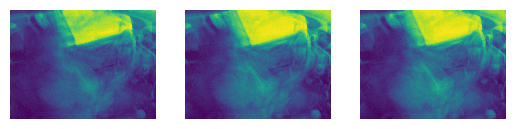

In [ ]:
layer_index = 0
cur_layer_shape = label_image_outputs[cur_label_1][layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(1, 3, filter + 1)
    plt.imshow(label_image_outputs[cur_label_1][layer_index][:,:,filter])
    plt.axis("off")

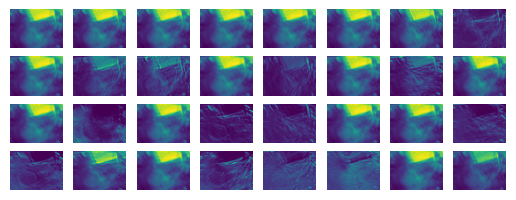

In [ ]:
layer_index = 1
cur_layer_shape = label_image_outputs[cur_label_1][layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(label_image_outputs[cur_label_1][layer_index][:,:,filter])
    plt.axis("off")

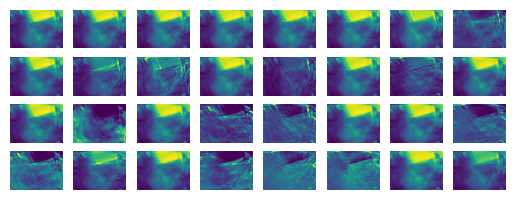

In [ ]:
layer_index = 2
cur_layer_shape = label_image_outputs[cur_label_1][layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(label_image_outputs[cur_label_1][layer_index][:,:,filter])
    plt.axis("off")

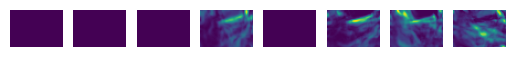

In [ ]:
layer_index = 3
cur_layer_shape = label_image_outputs[cur_label_1][layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(label_image_outputs[cur_label_1][layer_index][:,:,filter])
    plt.axis("off")

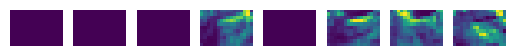

In [ ]:
layer_index = 4
cur_layer_shape = label_image_outputs[cur_label_1][layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(label_image_outputs[cur_label_1][layer_index][:,:,filter])
    plt.axis("off")

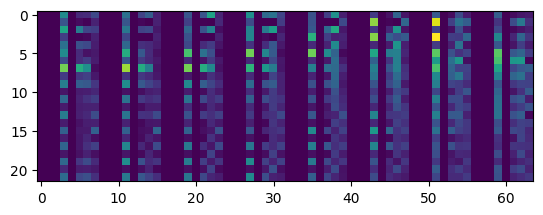

In [ ]:
layer_index = 5
cur_layer_shape = label_image_outputs[cur_label_1][layer_index].shape
plt.figure()
plt.imshow(label_image_outputs[cur_label_1][layer_index].numpy().reshape((flatten_size//64,64)))

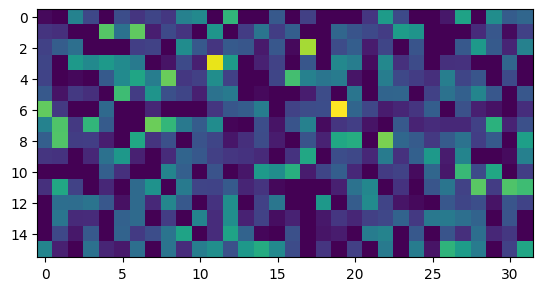

In [ ]:
layer_index = 6
cur_layer_shape = label_image_outputs[cur_label_1][layer_index].shape
plt.figure()
plt.imshow(label_image_outputs[cur_label_1][layer_index].numpy().reshape(first_dense_shape))

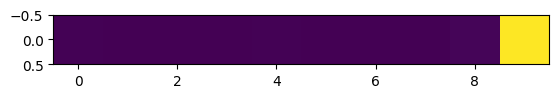

In [ ]:
layer_index = 7
cur_layer_shape = label_image_outputs[cur_label_1][layer_index].shape
plt.figure()
plt.imshow(label_image_outputs[cur_label_1][layer_index].numpy().reshape((1,10)))

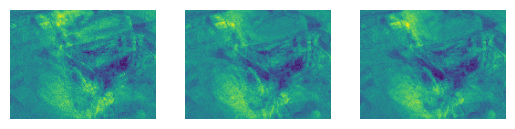

In [ ]:
layer_index = 0
cur_layer_shape = label_image_diff[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(1, 3, filter + 1)
    plt.imshow(label_image_diff[layer_index][:,:,filter])
    plt.axis("off")

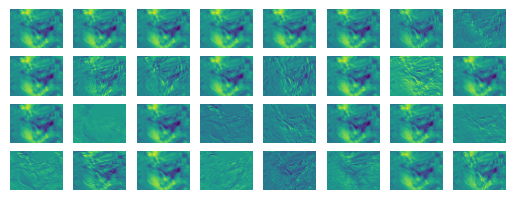

In [ ]:
layer_index = 1
cur_layer_shape = label_image_diff[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(label_image_diff[layer_index][:,:,filter])
    plt.axis("off")

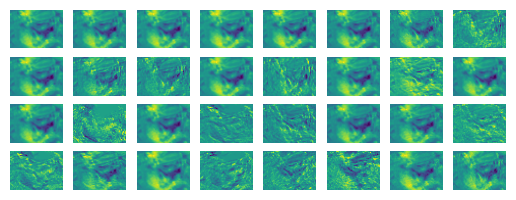

In [ ]:
layer_index = 2
cur_layer_shape = label_image_diff[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(label_image_diff[layer_index][:,:,filter])
    plt.axis("off")

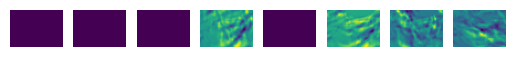

In [ ]:
layer_index = 3
cur_layer_shape = label_image_diff[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(label_image_diff[layer_index][:,:,filter])
    plt.axis("off")

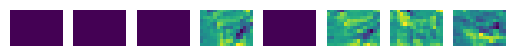

In [ ]:
layer_index = 4
cur_layer_shape = label_image_diff[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(label_image_diff[layer_index][:,:,filter])
    plt.axis("off")

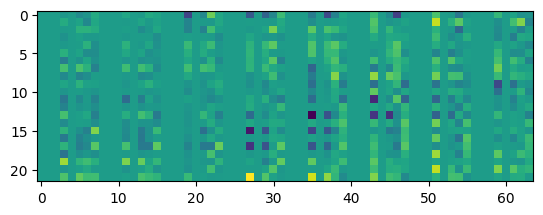

In [ ]:
layer_index = 5
cur_layer_shape = label_image_diff[layer_index].shape
plt.figure()
plt.imshow(label_image_diff[layer_index].numpy().reshape((flatten_size//64,64)))

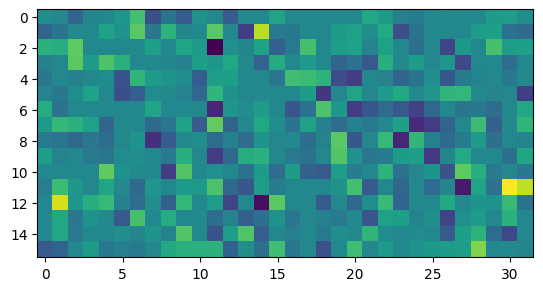

In [ ]:
layer_index = 6
cur_layer_shape = label_image_diff[layer_index].shape
plt.figure()
plt.imshow(label_image_diff[layer_index].numpy().reshape(first_dense_shape))

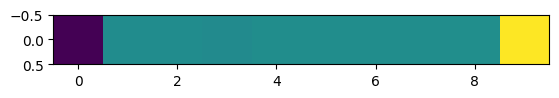

In [ ]:
layer_index = 7
cur_layer_shape = label_image_diff[layer_index].shape
plt.figure()
plt.imshow(label_image_diff[layer_index].numpy().reshape((1,10)))

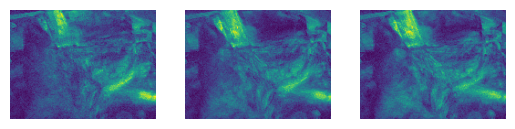

In [ ]:
layer_index = 0
cur_layer_shape = max_differences[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(1, 3, filter + 1)
    plt.imshow(max_differences[layer_index][:,:,filter])
    plt.axis("off")

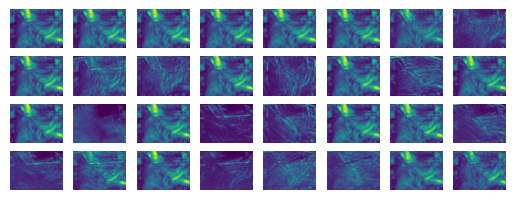

In [ ]:
layer_index = 1
cur_layer_shape = max_differences[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(max_differences[layer_index][:,:,filter])
    plt.axis("off")

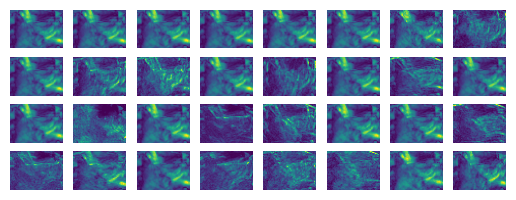

In [ ]:
layer_index = 2
cur_layer_shape = max_differences[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(max_differences[layer_index][:,:,filter])
    plt.axis("off")

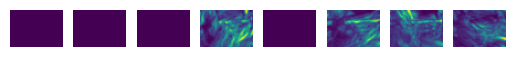

In [ ]:
layer_index = 3
cur_layer_shape = max_differences[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(max_differences[layer_index][:,:,filter])
    plt.axis("off")

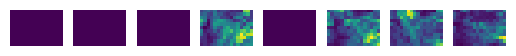

In [ ]:
layer_index = 4
cur_layer_shape = max_differences[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(max_differences[layer_index][:,:,filter])
    plt.axis("off")

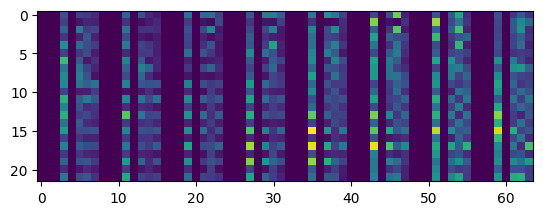

In [ ]:
layer_index = 5
cur_layer_shape = max_differences[layer_index].shape
plt.figure()
plt.imshow(max_differences[layer_index].numpy().reshape((flatten_size//64,64)))

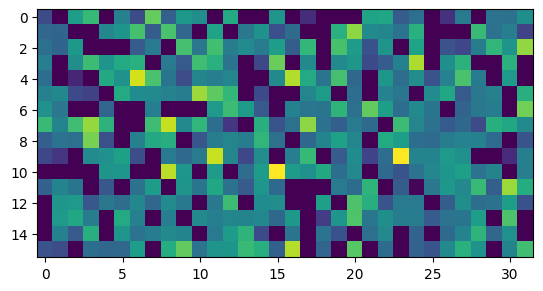

In [ ]:
layer_index = 6
cur_layer_shape = max_differences[layer_index].shape
plt.figure()
plt.imshow(max_differences[layer_index].numpy().reshape(first_dense_shape))

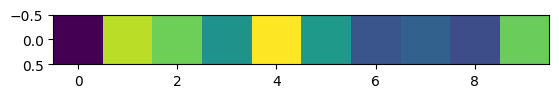

In [ ]:
layer_index = 7
cur_layer_shape = max_differences[layer_index].shape
plt.figure()
plt.imshow(max_differences[layer_index].numpy().reshape((1,10)))

In [ ]:
reserve_layer_outputs = [0 for x in range(100)]
reserve_layer_outputs_np = [0 for x in range(100)]

In [ ]:
layer_index = 0
reserve_layer_outputs[layer_index] = conv_model.layers[layer_index].call(reserve_noise_images)
reserve_layer_outputs_np[layer_index] = reserve_layer_outputs[layer_index].numpy()
layer_index = 1
reserve_layer_outputs[layer_index] = conv_model.layers[layer_index].call(reserve_layer_outputs[layer_index-1])
reserve_layer_outputs_np[layer_index] = reserve_layer_outputs[layer_index].numpy()
layer_index = 2
reserve_layer_outputs[layer_index] = conv_model.layers[layer_index].call(reserve_layer_outputs[layer_index-1])
reserve_layer_outputs_np[layer_index] = reserve_layer_outputs[layer_index].numpy()
layer_index = 3
reserve_layer_outputs[layer_index] = conv_model.layers[layer_index].call(reserve_layer_outputs[layer_index-1])
reserve_layer_outputs_np[layer_index] = reserve_layer_outputs[layer_index].numpy()
layer_index = 4
reserve_layer_outputs[layer_index] = conv_model.layers[layer_index].call(reserve_layer_outputs[layer_index-1])
reserve_layer_outputs_np[layer_index] = reserve_layer_outputs[layer_index].numpy()
layer_index = 5
reserve_layer_outputs[layer_index] = conv_model.layers[layer_index].call(reserve_layer_outputs[layer_index-1])
reserve_layer_outputs_np[layer_index] = reserve_layer_outputs[layer_index].numpy()
layer_index = 6
reserve_layer_outputs[layer_index] = conv_model.layers[layer_index].call(reserve_layer_outputs[layer_index-1])
reserve_layer_outputs_np[layer_index] = reserve_layer_outputs[layer_index].numpy()
layer_index = 7
reserve_layer_outputs[layer_index] = conv_model.layers[layer_index].call(reserve_layer_outputs[layer_index-1])
reserve_layer_outputs_np[layer_index] = reserve_layer_outputs[layer_index].numpy()

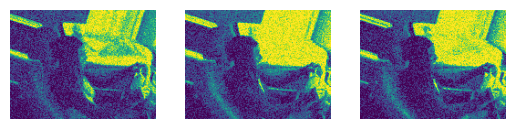

In [ ]:
layer_index = 0
image_index = 0
cur_layer_shape = reserve_layer_outputs[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(1, 3, filter + 1)
    plt.imshow(reserve_layer_outputs_np[layer_index][image_index][:,:,filter])
    plt.axis("off")

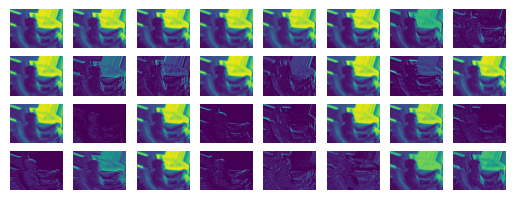

In [ ]:
layer_index = 1
cur_layer_shape = reserve_layer_outputs[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(reserve_layer_outputs_np[layer_index][image_index][:,:,filter])
    plt.axis("off")

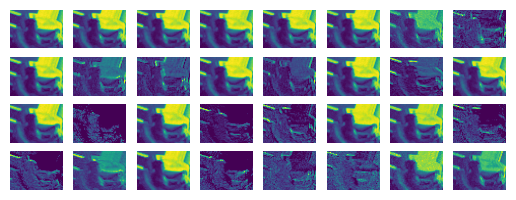

In [ ]:
layer_index = 2
cur_layer_shape = reserve_layer_outputs[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(reserve_layer_outputs_np[layer_index][image_index][:,:,filter])
    plt.axis("off")

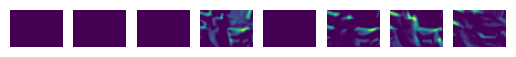

In [ ]:
layer_index = 3
cur_layer_shape = reserve_layer_outputs[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(reserve_layer_outputs_np[layer_index][image_index][:,:,filter])
    plt.axis("off")

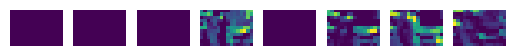

In [ ]:
layer_index = 4
cur_layer_shape = reserve_layer_outputs[layer_index].shape
plt.figure()
for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    ax = plt.subplot(8, 8, filter + 1)
    plt.imshow(reserve_layer_outputs_np[layer_index][image_index][:,:,filter])
    plt.axis("off")

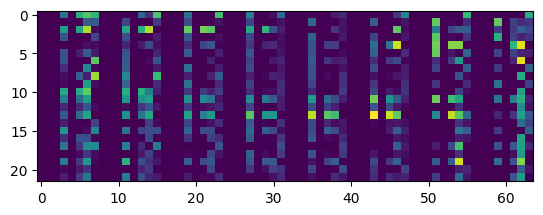

In [ ]:
#past this point we start getting into the flattened layers
#I'll attempt to render it anyways
layer_index = 5
cur_layer_shape = reserve_layer_outputs[layer_index].shape
plt.figure()
#for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    #ax = plt.subplot(8, 8, filter + 1)
    #plt.imshow(reserve_layer_outputs_np[layer_index][0][:,:,filter])
    #plt.axis("off")
plt.imshow(reserve_layer_outputs_np[layer_index][image_index].reshape((flatten_size//64,64)))

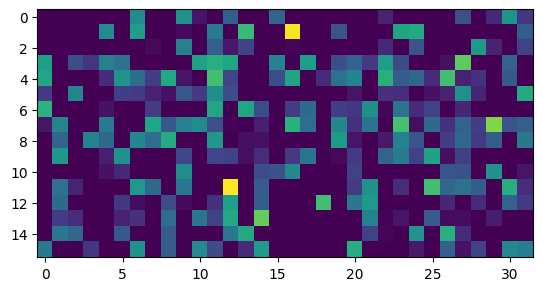

In [ ]:
layer_index = 6
cur_layer_shape = reserve_layer_outputs[layer_index].shape
plt.figure()
#for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    #ax = plt.subplot(8, 8, filter + 1)
    #plt.imshow(reserve_layer_outputs_np[layer_index][0][:,:,filter])
    #plt.axis("off")
plt.imshow(reserve_layer_outputs_np[layer_index][image_index].reshape(first_dense_shape))

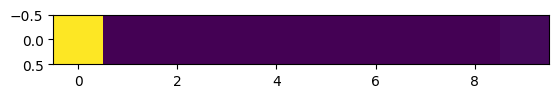

In [ ]:
layer_index = 7
cur_layer_shape = reserve_layer_outputs[layer_index].shape
plt.figure()
#for filter in range(cur_layer_shape[len(cur_layer_shape)-1]):
    #ax = plt.subplot(8, 8, filter + 1)
    #plt.imshow(reserve_layer_outputs_np[layer_index][0][:,:,filter])
    #plt.axis("off")
plt.imshow(reserve_layer_outputs_np[layer_index][image_index].reshape((1,10)))

In [ ]:
reserve_noise_labels[image_index]

array([1., 0., 0.], dtype=float32)

In [ ]:
from google.colab import files
uploads = files.upload()
print(uploads)

Saving img_2641.jpg to img_2641.jpg
{'img_2641.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x00\xf0\x01@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\x

(120, 160, 3)


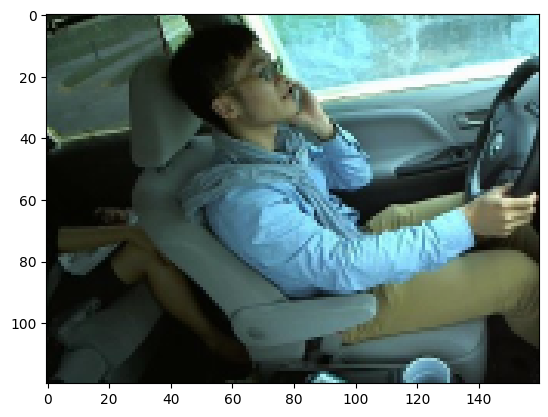

In [ ]:
import cv2
import matplotlib.pyplot as plt

uploads_key_arr = [x for x in uploads.keys()]
upload_image = cv2.imread(uploads_key_arr[0])
upload_image_normalized = cv2.cvtColor(upload_image, cv2.COLOR_BGR2RGB) / 256.0
upload_image_resized = cv2.resize(upload_image_normalized, dsize=my_image_size)
plt.imshow(upload_image_resized)
print(upload_image_resized.shape)

In [ ]:
label_names = {0: "Not Distracted",
               1: "Holding Phone (Right Hand)",
               2: "On Phone Call (Right Hand)",
               3: "Holding Phone (Left Hand)",
               4: "On Phone Call (Left Hand)",
               5: "Adjusting Radio",
               6: "Holding Drink",
               7: "Reaching Behind Seat",
               8: "Adjusting Hair/Face",
               9: "Looking Sideways/Behind"}

In [ ]:
upload_image_resized_np = np.array([upload_image_resized]).astype(np.float32) * 256

In [ ]:
result_string = label_names[np.argmax(conv_model.predict(upload_image_resized_np), axis=-1)[0]]
print()
mid_line_string = "|  Result: " + result_string + "  |"
print("=" * len(mid_line_string))
print(mid_line_string)
print("=" * len(mid_line_string))
#print(conv_model.predict(upload_image_resized_np))

1/1 [==============================] - 0s 18ms/step

|  Result: On Phone Call (Left Hand)  |
